## Introduction
# Australian Weather Data
This notebook looks at the Australian dataset, gathered from https://www.kaggle.com/sveneschlbeck/west-australia-weather-1944-2016

This is intended to be an exploritory look into the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import datetime
import matplotlib.pyplot as plt
#from sklearn.impute import IterativeImputer
import seaborn as sns


In [2]:
#uploading the file
if not os.path.isfile('aus_weather.csv'):
  from google.colab import files
  uploaded = files.upload()

Saving aus_weather.csv to aus_weather.csv


In [3]:
data = pd.read_csv('aus_weather.csv')
data

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,uv_MJ_m*m,Season
0,1944,5,1,0.0,NaN,NaN,0.00,0.0,NaN,3
1,1944,5,2,0.0,NaN,NaN,0.00,0.0,NaN,3
2,1944,5,3,0.0,NaN,NaN,0.00,0.0,NaN,3
3,1944,5,4,4.3,NaN,NaN,0.00,0.0,NaN,3
4,1944,5,5,0.0,NaN,NaN,0.00,0.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...
26538,2016,12,27,0.4,16.3,23.2,19.75,6.9,26.8,2
26539,2016,12,28,0.6,8.9,23.5,16.20,14.6,30.3,2
26540,2016,12,29,0.0,9.5,24.8,17.15,15.3,31.6,2
26541,2016,12,30,0.0,10.6,24.2,17.40,13.6,30.6,2


The dataset contains 26543 rows of data, however the earlier data contains a lot of NaNs. Dealing with these is a priority as we need to convert them to useable data without affecting the overall statistical properties.



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26543 entries, 0 to 26542
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         26543 non-null  int64  
 1   Month        26543 non-null  int64  
 2   Day          26543 non-null  int64  
 3   rainfall_mm  26543 non-null  float64
 4   min_temp_C   26435 non-null  float64
 5   max_temp_C   26480 non-null  float64
 6   daily_avg    26543 non-null  float64
 7   daily_range  26543 non-null  float64
 8   uv_MJ_m*m    9390 non-null   float64
 9   Season       26543 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.0 MB


In [5]:
#Counting the number of NaNs in the individual columns
data.isnull().sum()

Year               0
Month              0
Day                0
rainfall_mm        0
min_temp_C       108
max_temp_C        63
daily_avg          0
daily_range        0
uv_MJ_m*m      17153
Season             0
dtype: int64

In [6]:
data.describe()

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,uv_MJ_m*m,Season
count,26543.000000,26543.000000,26543.000000,26543.000000,26435.000000,26480.000000,26543.000000,26543.000000,9390.000000,26543.000000
mean,1980.164111,6.541160,15.730437,2.101281,12.104358,24.451828,18.224449,12.338684,18.967348,2.506499
std,20.979310,3.445064,8.800655,5.851269,4.736770,6.287806,5.203848,4.390402,8.726202,1.120981
min,1944.000000,1.000000,1.000000,0.000000,-1.300000,9.400000,0.000000,-20.600000,0.200000,1.000000
25%,1962.000000,4.000000,8.000000,0.000000,8.700000,19.400000,14.250000,9.200000,11.600000,1.000000
50%,1980.000000,7.000000,16.000000,0.000000,11.800000,23.200000,17.300000,12.400000,17.900000,3.000000
75%,1998.000000,10.000000,23.000000,0.600000,15.400000,28.800000,21.900000,15.300000,26.900000,4.000000
max,2016.000000,12.000000,31.000000,132.000000,28.700000,46.700000,36.800000,43.500000,37.100000,4.000000


##Plotting
Now that we have had a look at our data, it is important to plot the data so that it is easy to visualise, both for clarity and also for spotting any outliers within the dataset.

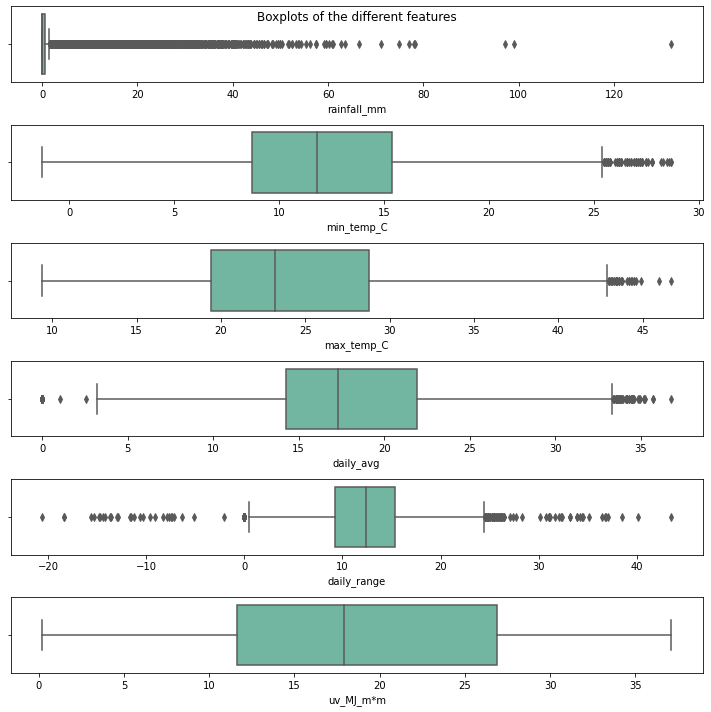

In [7]:
# Boxplots
fig, axes = plt.subplots(6, 1, figsize=(10,10), sharey=False)
fig.suptitle("Boxplots of the different features")

# Rainfall
sns.boxplot(x= 'rainfall_mm', data = data, palette = 'Set2', ax = axes[0])
axes[0].set_title("")

# Min temp
sns.boxplot(x= 'min_temp_C', data = data, palette = 'Set2', ax = axes[1])
axes[1].set_title("")

# Max temp
sns.boxplot(x= 'max_temp_C', data = data, palette = 'Set2', ax = axes[2])
axes[2].set_title("")

# Daily avg.
sns.boxplot(x= 'daily_avg', data = data, palette = 'Set2', ax = axes[3])
axes[3].set_title("")

# Daily range
sns.boxplot(x= 'daily_range', data = data, palette = 'Set2', ax = axes[4])
axes[4].set_title("")

# uv_MJ_m*m
sns.boxplot(x= 'uv_MJ_m*m', data = data, palette = 'Set2', ax = axes[5])
axes[5].set_title("")

plt.tight_layout()

Interestingly there are numerous outliers in rainfall, min temp and max temp

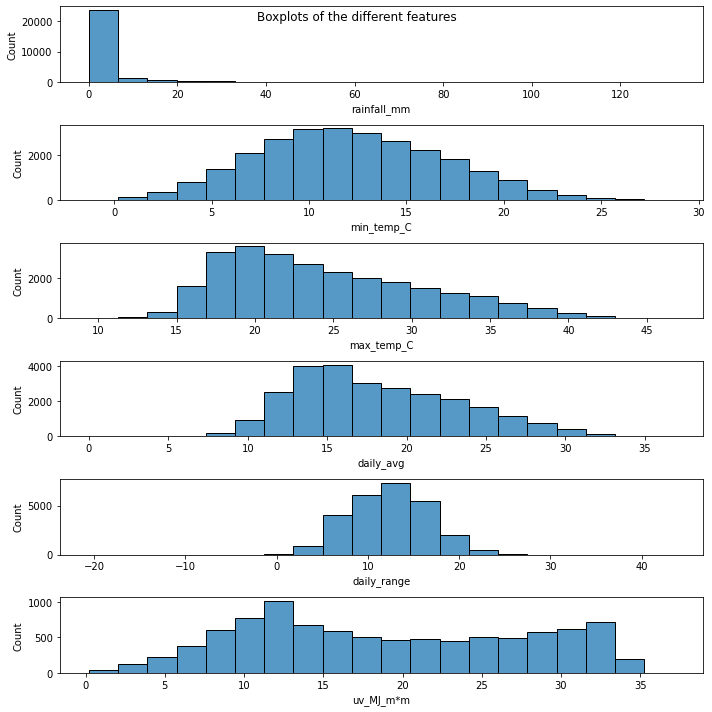

In [8]:
# Histograms
fig, axes = plt.subplots(6, 1, figsize=(10,10), sharey=False)
fig.suptitle("Boxplots of the different features")

# Rainfall
sns.histplot(x= 'rainfall_mm', data = data, palette = 'Set2', ax = axes[0], bins=20)
axes[0].set_title("")

# Min temp
sns.histplot(x= 'min_temp_C', data = data, palette = 'Set2', ax = axes[1], bins=20)
axes[1].set_title("")

# Max temp
sns.histplot(x= 'max_temp_C', data = data, palette = 'Set2', ax = axes[2], bins=20)
axes[2].set_title("")

# Daily avg.
sns.histplot(x= 'daily_avg', data = data, palette = 'Set2', ax = axes[3], bins=20)
axes[3].set_title("")

# Daily range
sns.histplot(x= 'daily_range', data = data, palette = 'Set2', ax = axes[4], bins=20)
axes[4].set_title("")

# uv_MJ_m*m
sns.histplot(x= 'uv_MJ_m*m', data = data, palette = 'Set2', ax = axes[5], bins=20)
axes[5].set_title("")

plt.tight_layout()

From these histograms it is clear that there is right skewness in the rainfall_mm and max_temp_C features. 

In [9]:
# determine index for continuous variables
num_feats = data.dtypes[data.dtypes != 'int64'].index
# calculates skew and sorts
skew_feats = data[num_feats].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_feats})
skewness

,skew
rainfall_mm,4.890339
max_temp_C,0.622530
daily_avg,0.457406
min_temp_C,0.208089
uv_MJ_m*m,0.120025
daily_range,0.013451


This confirms that the rainfall_mm feature needs to have some manipulation to it, if a logistic regression model is desired.

Since we also need to deal with the NaNs in the dataset, now is a good time to start parsing the data.

## Data Parsing

In [10]:
# Check the quartile ranges
for column in ["rainfall_mm", "max_temp_C", "daily_avg", "min_temp_C", "uv_MJ_m*m", "daily_range"]:
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25) # Inter-quartile range
    Lower_fence = data[column].quantile(0.25) - (IQR * 3) # Lower bound
    Upper_fence = data[column].quantile(0.75) + (IQR * 3) # Upper bound
    print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

rainfall_mm outliers are values < -1.8 or > 2.4
max_temp_C outliers are values < -8.8 or > 57.0
daily_avg outliers are values < -8.7 or > 44.85
min_temp_C outliers are values < -11.4 or > 35.5
uv_MJ_m*m outliers are values < -34.3 or > 72.8
daily_range outliers are values < -9.1 or > 33.6


It is worth noting that a rainy day is defined as rainfall $> 2.5mm$ which is close to our upper boundary gathered from this data.

In [ ]:
# check the NaNs and/or missing values

In [11]:
def add_is_rain(df: pd.DataFrame):
  raincheck = []
  for i in range(len(df)):
    if df['rainfall_mm'][i] < 2.5: #Can change this to be < 2.5
      raincheck.append(0) # instead of bool values, ill set them to 0 if no rain, 1 if there's rain
    else:
      raincheck.append(1)
  df["is_rain"] = raincheck
  return df

In [12]:
data_w_rain = add_is_rain(data)
data_w_rain['is_rain'].values.sum()/len(data_w_rain)*100

17.586557661153602

Interestingly, only 31% of the days in the dataset are rain days, and with a tolerence of $2.5mm$ of rainfall classiftying a rainy day, 